A. Загрузка и первичный обзор

In [59]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Top-100 Trending Books.csv")
print(df.head(5))
print(df.tail(5))
print(df.info())
print(df.shape)

   Rank                                         book title  book price  \
0     1                       Iron Flame (The Empyrean, 2)       18.42   
1     2                                    The Woman in Me       20.93   
2     3                                  My Name Is Barbra       31.50   
3     4  Friends, Lovers, and the Big Terrible Thing: A...       23.99   
4     5                              How to Catch a Turkey        5.65   

   rating            author  year of publication               genre  \
0     4.1    Rebecca Yarros                 2023     Fantasy Romance   
1     4.5    Britney Spears                 2023              Memoir   
2     4.5  Barbra Streisand                 2023       Autobiography   
3     4.4     Matthew Perry                 2023              Memoir   
4     4.8      Adam Wallace                 2018  Childrens, Fiction   

                                                 url  
0  amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...  
1  amazon.co

B. Обработка данных

In [60]:
#Пропущенные значения
print(df.isnull().sum())
df_cleaned = df.dropna(subset=['rating'])
print(df_cleaned.info())
print(df_cleaned.isnull().sum())

Rank                   0
book title             0
book price             0
rating                 3
author                 0
year of publication    0
genre                  0
url                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 97 non-null     int64  
 1   book title           97 non-null     object 
 2   book price           97 non-null     float64
 3   rating               97 non-null     float64
 4   author               97 non-null     object 
 5   year of publication  97 non-null     int64  
 6   genre                97 non-null     object 
 7   url                  97 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.8+ KB
None
Rank                   0
book title             0
book price             0
rating                 0
author                 

In [61]:
# Дубликаты

duplicates_count = df_cleaned.duplicated().sum()
print(f"Количество дублирующихся строк: {duplicates_count}")

# Дубликатов нет, но если бы были (df_no_duplicates = df_cleaned.drop_duplicates())

Количество дублирующихся строк: 0


In [62]:
# Выбросы
z_scores = np.abs(
    (df["book price"] - df["book price"].mean()) / df["book price"].std()
)

outliers = df[z_scores > 3]
outliers
# Оказалось два выброса в столбце book price
df = df[z_scores <= 3]

In [63]:
# Статистики данных:

# Описательная статистика
print(df_cleaned.describe())

# Уникальные значения и их частоты для 'genre':
print(df_cleaned['genre'].value_counts())

# Уникальные значения и их частоты для 'author' (топ-10):
print(df_cleaned['author'].value_counts().head(10))

# Уникальные значения и их частоты для 'year of publication':
print(df_cleaned['year of publication'].value_counts().sort_index().head(10))

# Корреляционный анализ
print(df_cleaned.select_dtypes(include=['number']).corr())

             Rank  book price     rating  year of publication
count   97.000000   97.000000  97.000000            97.000000
mean    50.443299   12.518351   4.689691          2013.546392
std     29.117924    7.960496   0.181133            15.303881
min      1.000000    2.780000   4.100000          1947.000000
25%     26.000000    6.280000   4.600000          2014.000000
50%     51.000000   11.200000   4.700000          2019.000000
75%     75.000000   16.740000   4.800000          2023.000000
max    100.000000   48.770000   5.000000          2024.000000
genre
Nonfiction                                             6
Childrens, literature                                  5
Childrens                                              4
Fantasy                                                3
Memoir                                                 3
                                                      ..
Thriller, Mystery                                      1
Personal Finance                     

C. Визуализация данных

Text(0, 0.5, 'Count book')

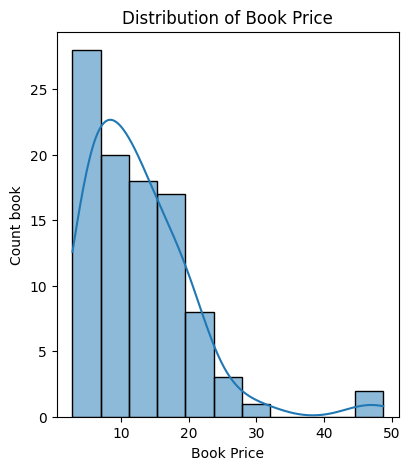

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограммы распределения 'book price',
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned['book price'], kde=True)
plt.title('Distribution of Book Price')
plt.xlabel('Book Price')
plt.ylabel('Count book')

/tmp/ipython-input-3881289404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


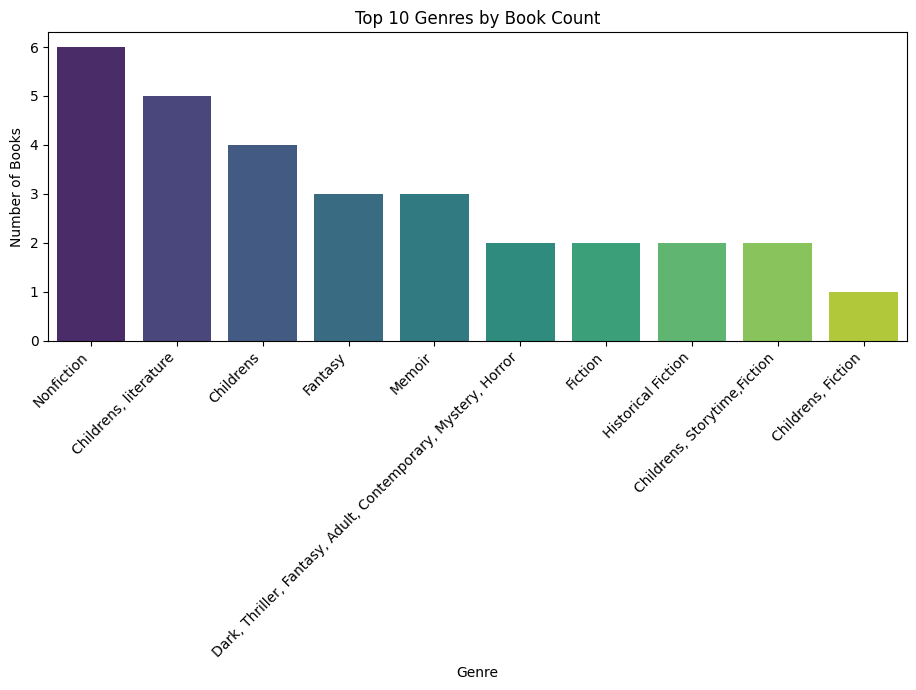

In [65]:
#  Гистограммы для топ-10 жанров по количеству книг.
top_genres = df_cleaned['genre'].value_counts().head(10)

plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Book Count')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

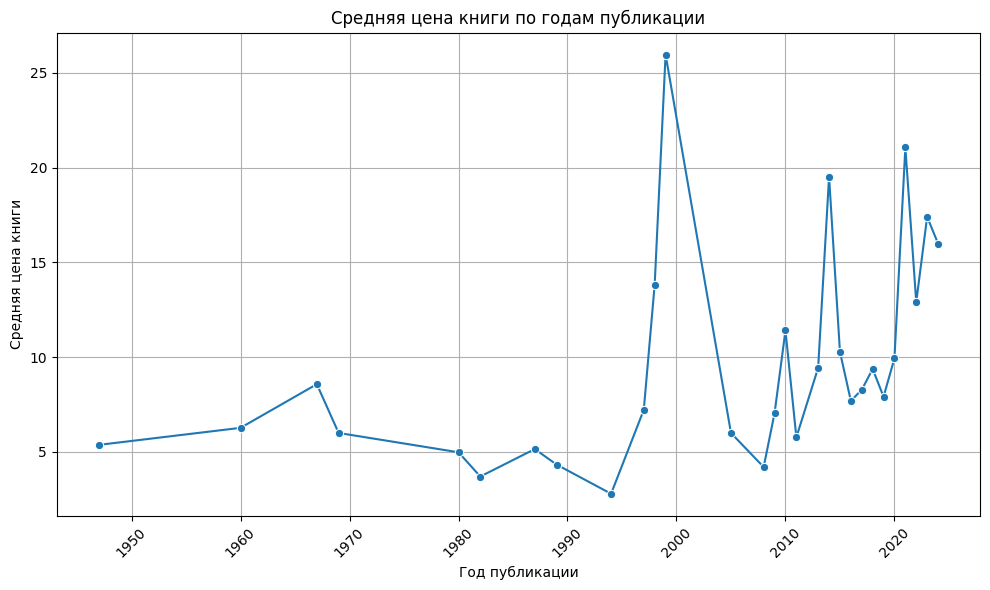

In [66]:
trends_by_year = df_cleaned.groupby('year of publication')[['book price', 'rating']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=trends_by_year, x='year of publication', y='book price', marker='o')
plt.title('Средняя цена книги по годам публикации')
plt.xlabel('Год публикации')
plt.ylabel('Средняя цена книги')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

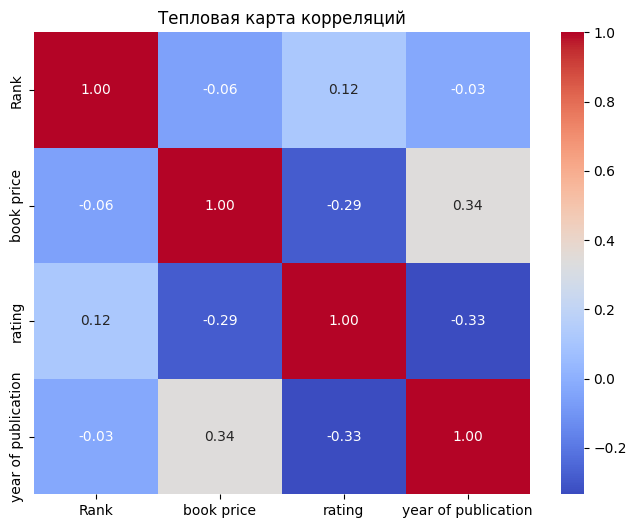

In [67]:
correlation_matrix = df_cleaned.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляций')
plt.show()

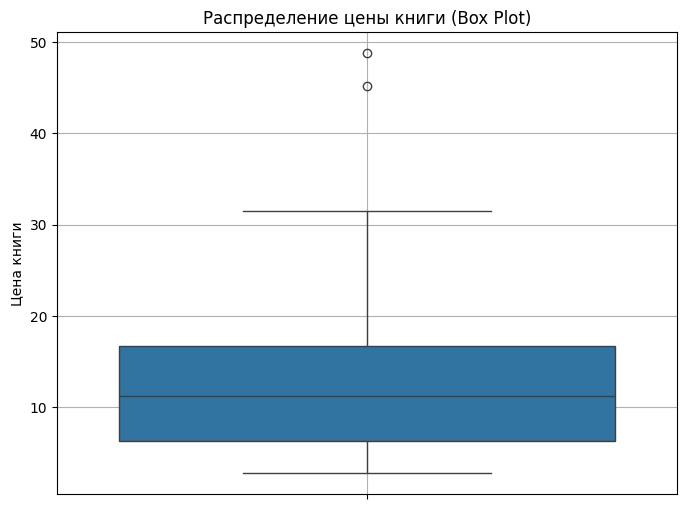

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['book price'])
plt.title('Распределение цены книги (Box Plot)')
plt.ylabel('Цена книги')
plt.grid(True)
plt.show()

D. Группировки и агрегации

In [69]:
# Средняя цена и рейтинг по жанрам
genre_stats = df_cleaned.groupby('genre')[['book price', 'rating']].mean()
print(genre_stats.head())

# Количество книг по авторам
author_book_counts = df_cleaned.groupby('author').size()
print(author_book_counts.head())

# Сводная таблица средней цены по жанрам и году публикации
pivot_table_price = df_cleaned.pivot_table(values='book price', index='genre', columns='year of publication', aggfunc='mean')
print(pivot_table_price.head())

                                                    book price  rating
genre                                                                 
 young adult novel, adventure novel, survival s...        5.14     4.7
Adventure, War, Science Fiction, Romance, Actio...       15.79     4.6
Adventure, War, Science fiction, Romance, Actio...       10.99     4.6
Autobiography                                            31.50     4.5
Biography, Nonfiction, Business, Technology              20.99     4.7
author
 Penguin Young Readers Licenses (    1
 Scholastic                          1
 Wendy Loggia                        1
Abraham Verghese                     1
Adam M. Grant                        1
dtype: int64
year of publication                                 1947  1960  1967  1969  \
genre                                                                        
 young adult novel, adventure novel, survival s...   NaN   NaN   NaN   NaN   
Adventure, War, Science Fiction, Romance, Actio...   N